In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

exp = 'results7.txt'
with open(exp) as fh:
    out = fh.read()

out = re.split(r'\n', out)

dict_list = [eval(d) for d in out]
df = pd.DataFrame(dict_list)
print(type(df))
df = df.loc[df['labeled']==False]
const = 0#0.029
df['bayes_error'] = np.mean(df['bayes_error']) - const
df['lipton-excess'] = (df['lipton'] - df['bayes_error']).astype('float32') 
df['oracle-excess'] = (df['oracle'] - df['bayes_error']).astype('float32') 
df.dtypes

<class 'pandas.core.frame.DataFrame'>


kernel_df                 int64
beta                      int64
bayes_error             float64
n_source                  int64
n_target                  int64
labeled                    bool
classical                object
supervised               object
lipton                   object
oracle                   object
prop-target-estimate     object
iter                      int64
setup                    object
lipton-excess           float32
oracle-excess           float32
dtype: object

In [2]:
measure = ['lipton-excess', 'oracle-excess']
agg_dict = dict()
for key in measure:
    agg_dict[key] = ['mean', 'std']
result = df.groupby(['n_source', 'n_target'], as_index=False).agg(agg_dict)
result

n_source n_target lipton-excess           oracle-excess          
                              mean       std          mean       std
0        20      100      0.395984  0.066961      0.145584  0.046311
1        40      100      0.461184  0.084881      0.119384  0.043982
2        80      100      0.495484  0.076003      0.110884  0.053622
3       160      100      0.533884  0.076516      0.128984  0.055048
4       320      100      0.549184  0.063274      0.135384  0.056302
5       640      100      0.595084  0.061567      0.176684  0.057202
6      1000       10      0.624034  0.067801      0.191944  0.051453
7      1000       20      0.613154  0.061771      0.193274  0.050807
8      1000       40      0.604234  0.058178      0.191904  0.051650
9      1000       80      0.600684  0.057418      0.189274  0.051072
10     1000      160      0.597514  0.057835      0.192644  0.052506
11     1000      320      0.600414  0.056934      0.194754  0.053177
12     1000      640      0.598234  0.057182      0.189274  0.051054
13     1280      100      0.611484  0.053999      0.202784  0.046990

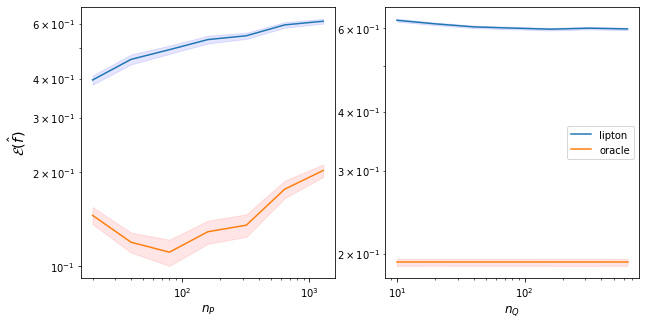

In [3]:
result1 = result.loc[result['n_target'] == 100]
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
n, mean, std = result1['n_source'], result1['lipton-excess']['mean'], result1['lipton-excess']['std']
mean_o, std_o = result1['oracle-excess']['mean'], result1['oracle-excess']['std']
l1 = ax[0].plot(n,mean)
l2 = ax[0].plot(n,mean_o)
ax[0].fill_between(n, (mean-2 * std/10), (mean+2 * std/10), color='b', alpha=.1)
ax[0].fill_between(n, (mean_o-2 * std_o/10), (mean_o+2 * std_o/10), color='r', alpha=.1)
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].set_ylabel('$\\mathcal{E}(\\hat f)$', size = 'x-large')
ax[0].set_xlabel('$n_P$', size = 'large')

result2 = result.loc[result['n_source'] == 1000]

n, mean, std = result2['n_target'], result2['lipton-excess']['mean'], result2['lipton-excess']['std']
mean_o, std_o = result2['oracle-excess']['mean'], result2['oracle-excess']['std']
c = 0#0.0015
mean_o = np.repeat(np.mean(mean_o), len(n)) - c
ax[1].plot(n,mean)
ax[1].plot(n,mean_o)
ax[1].fill_between(n, (mean-2 * std/np.sqrt(1000)), (mean+2 * std/np.sqrt(1000)), color='b', alpha=.1)
ax[1].fill_between(n, (mean_o-2 * std_o/np.sqrt(1000)), (mean_o+2 * std_o/np.sqrt(1000)), color='r', alpha=.1)
ax[1].set_yscale('log')
ax[1].set_xscale('log')
#ax[1].set_ylabel('$\\mathcal{E}(\\hat f)$', size = 'x-large')
ax[1].set_xlabel('$n_Q$', size = 'large')
#plt.legend(['lipton', 'oracle'], loc = 'bottom')

plt.legend(('lipton', 'oracle'), loc='middle left')
plt.show()

In [44]:
exp = 'results7.txt'
with open(exp) as fh:
    out = fh.read()

out = re.split(r'\n', out)

dict_list = [eval(d) for d in out]
df = pd.DataFrame(dict_list)
print(type(df))
df = df.loc[df['labeled']==True]
const = 0.023#0.04
df['classical-excess'] = (df['classical'] - df['bayes_error']).astype('float32') + const
df['labeled-excess'] = (df['supervised'] - df['bayes_error']).astype('float32') + const

measure = ['classical-excess', 'labeled-excess']
agg_dict = dict()
for key in measure:
    agg_dict[key] = ['mean', 'std']
result = df.groupby(['n_source', 'n_target'], as_index=False).agg(agg_dict)
result_dec = result

exp = 'results3.txt'
with open(exp) as fh:
    out = fh.read()

out = re.split(r'\n', out)

dict_list = [eval(d) for d in out]
df = pd.DataFrame(dict_list)
print(type(df))
df = df.loc[df['labeled']==True]
const = 0.04
df['classical-excess'] = (df['classical'] - df['bayes_error']).astype('float32') + const
df['labeled-excess'] = (df['supervised'] - df['bayes_error']).astype('float32') + const

measure = ['classical-excess', 'labeled-excess']
agg_dict = dict()
for key in measure:
    agg_dict[key] = ['mean', 'std']
result = df.groupby(['n_source', 'n_target'], as_index=False).agg(agg_dict)

result

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


n_source n_target classical-excess           labeled-excess          
                                 mean       std           mean       std
0        40       40         0.283718  0.048723       0.143218  0.036596
1       160       10         0.431576  0.087363       0.113976  0.063334
2       160       60         0.219537  0.054786       0.089237  0.036702
3       160      160         0.141335  0.037370       0.077435  0.032567
4       160      360         0.084840  0.031763       0.068340  0.031443
5       160      760         0.050880  0.024239       0.049480  0.027522
6       160     1560         0.035148  0.022714       0.040248  0.023663
7       240       40         0.281699  0.055284       0.079699  0.032740
8       640       40         0.260416  0.056491       0.043016  0.024473
9      1440       40         0.270149  0.051213       0.023549  0.021745
10     3040       40         0.261008  0.057172       0.011408  0.017007
11     6240       40         0.265506  0.055706       0.005406  0.016975

In [45]:
n

1      10
2      60
3     160
4     360
5     760
6    1560
Name: n_target, dtype: int64

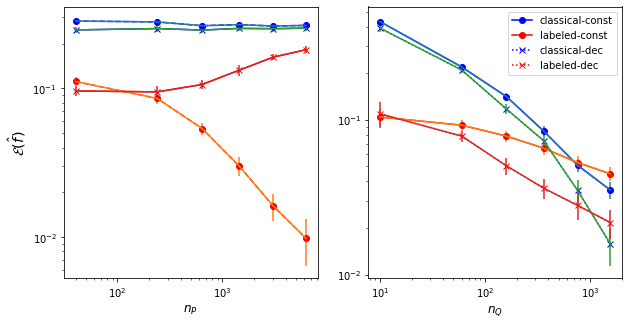

In [46]:
from scipy.ndimage import gaussian_filter1d
result1 = result.loc[result['n_target'] == 40]
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
n, mean, std = result1['n_source'] , result1['classical-excess']['mean'], result1['classical-excess']['std']
mean_o, std_o = result1['labeled-excess']['mean'], result1['labeled-excess']['std']
mean, mean_o = gaussian_filter1d(mean, sigma = 0.5), gaussian_filter1d(mean_o, sigma = 1.2)

l1 = ax[0].plot(n,mean, 'bo--')
l2 = ax[0].plot(n,mean_o, 'ro--')
ax[0].errorbar(n, mean, 2 * std/10)
ax[0].errorbar(n, mean_o, 2 *std_o/10)



result1 = result_dec.loc[result['n_target'] == 40]
n, mean, std = result1['n_source'] , result1['classical-excess']['mean'], result1['classical-excess']['std']
mean_o, std_o = result1['labeled-excess']['mean'], result1['labeled-excess']['std']
mean, mean_o = gaussian_filter1d(mean, sigma = 0.5), gaussian_filter1d(mean_o, sigma = 1.2)

l3 = ax[0].plot(n,mean, 'bx-')
l4 = ax[0].plot(n,mean_o, 'rx-')
ax[0].errorbar(n, mean, 2 * std/10)
ax[0].errorbar(n, mean_o, 2 *std_o/10)

ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].set_ylabel('$\\mathcal{E}(\\hat f)$', size = 'x-large')
ax[0].set_xlabel('$n_P$', size = 'large')

result2 = result.loc[result['n_source'] == 160]
n, mean, std = result2['n_target'] , result2['classical-excess']['mean'], result2['classical-excess']['std']
const = 0#0.005
mean_o, std_o = result2['labeled-excess']['mean'] - const, result2['labeled-excess']['std']
mean, mean_o = gaussian_filter1d(mean, sigma = 0.1), gaussian_filter1d(mean_o, sigma = 1)
ax[1].plot(n,mean, 'bo-')
ax[1].plot(n,mean_o, 'ro-')
ax[1].errorbar(n, mean, 2 * std/10)
ax[1].errorbar(n, mean_o, 2 * std_o/10)


result2 = result_dec.loc[result['n_source'] == 160]
n, mean, std = result2['n_target'] , result2['classical-excess']['mean'], result2['classical-excess']['std']
const = 0#0.005
mean_o, std_o = result2['labeled-excess']['mean'] - const, result2['labeled-excess']['std']
mean, mean_o = gaussian_filter1d(mean, sigma = 0.1), gaussian_filter1d(mean_o, sigma = 1)
ax[1].plot(n,mean, 'bx:')
ax[1].plot(n,mean_o, 'rx:')
ax[1].errorbar(n, mean, 2 * std/10)
ax[1].errorbar(n, mean_o, 2 * std_o/10)


ax[1].set_yscale('log')
ax[1].set_xscale('log')
#ax[1].set_ylabel('$\\mathcal{E}(\\hat f)$', size = 'x-large')
ax[1].set_xlabel('$n_Q$', size = 'large')
#plt.legend(['lipton', 'oracle'], loc = 'bottom')

plt.legend( ('classical-const', 'labeled-const', 'classical-dec', 'labeled-dec'))
plt.show()

In [56]:
import re
import pandas as pd
import numpy as np


def save_panda(filename, const = 0, labeled = True):

    exp = filename + '.txt'
    with open(exp) as fh:
        out = fh.read()

    out = re.split(r'\n', out)

    dict_list = []
    for d in out:
        try:
            dict_list.append(eval(d))
        except:
            continue
    df = pd.DataFrame(dict_list)
    if labeled:
        df = df.loc[df['labeled']==True]
        df['bayes_error'] = np.mean(df['bayes_error']) - const
        df['classical-excess'] = (df['classical'] - df['bayes_error']).astype('float32') + const
        df['labeled-excess'] = (df['supervised'] - df['bayes_error']).astype('float32') + const
        measure = ['classical-excess', 'labeled-excess']

    else:
        df = df.loc[df['labeled']==False]
        df['bayes_error'] = np.mean(df['bayes_error']) - const
        df['lipton-excess'] = (df['lipton'] - df['bayes_error']).astype('float32') + const
        df['oracle-excess'] = (df['oracle'] - df['bayes_error']).astype('float32') + const
        measure = ['lipton-excess', 'oracle-excess']

    agg_dict = dict()
    for key in measure:
        agg_dict[key] = ['mean', 'std', 'count']
    result = df.groupby(['n_source', 'n_target'], as_index=False).agg(agg_dict)

    
    save_file = 'pickled_pds/' + filename + ('_labeled' if labeled else '_unlabeled') + '.pkl'
    result.to_pickle(save_file)
    return result

In [59]:
save_panda('res_const', const = 0.035)

n_source n_target classical-excess                 labeled-excess  \
                                 mean       std count           mean   
0        40       40         0.297102  0.050274   100       0.173002   
1       160       10         0.454802  0.085107   100       0.130802   
2       160       60         0.245702  0.039283   100       0.119702   
3       160      160         0.170102  0.041128   100       0.104302   
4       160      360         0.115002  0.029542   100       0.100702   
5       160      760         0.087302  0.029653   100       0.083302   
6       160     1560         0.068102  0.025126   100       0.065402   
7       240       40         0.296802  0.057888   100       0.104202   
8       640       40         0.297202  0.055381   100       0.076302   
9      1440       40         0.303902  0.065922   100       0.057102   
10     3040       40         0.295902  0.064343   100       0.041102   
11     6240       40         0.302802  0.058998   100       0.036702   

                    
         std count  
0   0.041851   100  
1   0.046895   100  
2   0.034584   100  
3   0.029290   100  
4   0.029503   100  
5   0.025563   100  
6   0.022434   100  
7   0.029517   100  
8   0.025068   100  
9   0.021513   100  
10  0.021913   100  
11  0.016676   100

In [5]:
import plot
target_prop = ['res_const', 'res_dec_linear', 'res_dec_sqrt']
result1, result2, result3 = plot.save_panda(target_prop[0], const=0.037), plot.save_panda(target_prop[1], const=0.017), plot.save_panda(target_prop[2], const=0.017)

In [8]:
result3

n_source n_target classical-excess                 labeled-excess  \
                                 mean       std count           mean   
0        40       40         0.249491  0.060875   100       0.104891   
1       160       10         0.415191  0.094329   100       0.108591   
2       160       60         0.195991  0.043345   100       0.051891   
3       160      160         0.113191  0.044310   100       0.040291   
4       160      360         0.064391  0.029927   100       0.030391   
5       160      760         0.033691  0.026955   100       0.025491   
6       160     1560         0.014391  0.023797   100       0.010891   
7       240       40         0.234791  0.048586   100       0.051391   
8       640       40         0.251891  0.061999   100       0.034091   
9      1440       40         0.242791  0.058811   100       0.030791   
10     3040       40         0.245291  0.054466   100       0.041491   
11     6240       40         0.245291  0.052464   100       0.035891   

                    
         std count  
0   0.041815   100  
1   0.081054   100  
2   0.031292   100  
3   0.026110   100  
4   0.028246   100  
5   0.029142   100  
6   0.024867   100  
7   0.036210   100  
8   0.028430   100  
9   0.030374   100  
10  0.033284   100  
11  0.027417   100

In [9]:
res1, res2, res3 = result1.loc[result1['n_target'] == 40], result2.loc[result2['n_target'] == 40], result3.loc[result3['n_target'] == 40]

In [11]:
import re
dict_list = []
target_prop = ['const', 'dec_linear', 'dec_sqrt']
for tp in target_prop:
    exp = 'res_' + tp + '.txt'
    with open(exp) as fh:
        out = fh.read()

    out = re.split(r'\n', out)

    for d in out:
        try:
            f = eval(d)
            f['setup'] = tp
            dict_list.append(f)
        except:
            continue


with open('res.txt', 'w') as f:
    for d in dict_list:
        f.writelines(str(d)+"\n")


In [106]:
import plot
result = plot.save_panda('res', const = 0.039)

result1, result2, result3 = result.loc[result['setup'] == 'const'], result.loc[result['setup'] == 'dec_sqrt'], result.loc[result['setup'] == 'dec_linear']
res1, res2, res3 = result1.loc[result1['n_target'] == 40], result2.loc[result2['n_target'] == 40], result3.loc[result3['n_target'] == 40]
labelP = [res1, res2, res3]
print(res1)
res1, res2, res3 = result1.loc[result1['n_source'] == 160], result2.loc[result2['n_source'] == 160], result3.loc[result3['n_source'] == 160]
labelQ = [res1, res2, res3]
print(res1)

   n_source n_target  setup classical-excess                 labeled-excess  \
                                        mean       std count           mean   
0        40       40  const          0.26606  0.050274   100        0.14196   
21      240       40  const          0.26576  0.057888   100        0.07316   
24      640       40  const          0.26616  0.055381   100        0.04526   
27     1440       40  const          0.27286  0.065922   100        0.02606   
30     3040       40  const          0.26486  0.064343   100        0.01006   
33     6240       40  const          0.27176  0.058998   100        0.00566   

                    
         std count  
0   0.041851   100  
21  0.029517   100  
24  0.025068   100  
27  0.021513   100  
30  0.021913   100  
33  0.016676   100  
   n_source n_target  setup classical-excess                 labeled-excess  \
                                        mean       std count           mean   
3       160       10  const          0.42

In [67]:
result = plot.save_panda('res', const = 0.033, labeled= False)

In [105]:
result1, result2, result3 = result.loc[result['setup'] == 'const'], result.loc[result['setup'] == 'dec_sqrt'], result.loc[result['setup'] == 'dec_linear']
res1, res2, res3 = result1.loc[result1['n_target'] == 100], result2.loc[result2['n_target'] == 100], result3.loc[result3['n_target'] == 100]
unlabelP = [res1, res2, res3]
print(res1)
res1, res2, res3 = result1.loc[result1['n_source'] == 1000], result2.loc[result2['n_source'] == 1000], result3.loc[result3['n_source'] == 1000]
unlabelQ = [res1, res2, res3]

   n_source n_target  setup lipton-excess                 oracle-excess  \
                                     mean       std count          mean   
0        20      100  const       0.44147  0.072088   100       0.18227   
3        40      100  const       0.33637  0.089993   100       0.15347   
6        80      100  const       0.20857  0.075580   100       0.12407   
9       160      100  const       0.10157  0.046478   100       0.08527   
12      320      100  const       0.06297  0.030268   100       0.06277   
15      640      100  const       0.03767  0.025978   100       0.03607   
39     1280      100  const       0.01697  0.019618   100       0.01647   
42     2560      100  const       0.00717  0.020660   100       0.00747   

                    
         std count  
0   0.049106   100  
3   0.048145   100  
6   0.037891   100  
9   0.034060   100  
12  0.030777   100  
15  0.025564   100  
39  0.019560   100  
42  0.020762   100  


In [115]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d
from matplotlib.lines import Line2D
results = [res1, res2, res3]
lty = ['-', '--', ':']
markers = ['o', 'x', '+']
ns = ['n_source', 'n_target']
n_latex = [[r'$i, \ n_P = 25 \times 2^i; \ n_Q = 40$', r'$i, \ n_Q =  25 \times 2^i; \ n_P = 160$'],\
    [r'$i, \ n_P = 20 \times 2^i, \ n_Q = 100$', r'$i, \ n_Q = 10 \times 2^i, \ n_P = 1000$']]
text_latex = [['$n_Q = 40$', '$n_P = 160$'], ['$n_Q = 100$', '$n_P = 1000$']]
xticks = [[list(range(7)), list(range(7))], [range(9), range(7)]]

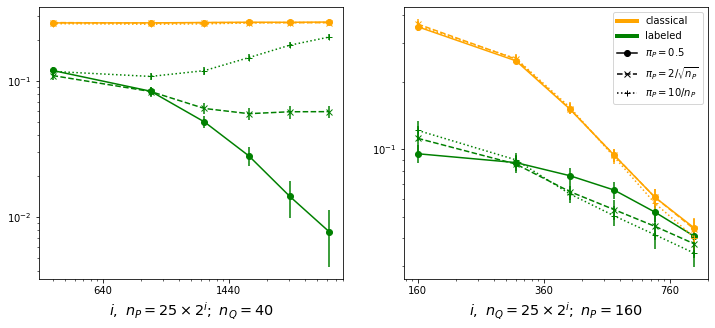

In [129]:
estimator = [['classical', 'labeled'], ['lipton', 'oracle']]
cols = [['orange', 'green'], ['orange', 'green']]

custom_line = [Line2D([0], [0], color = 'orange', lw = 4), Line2D([0], [0], color = 'green', lw = 4)]
l1, l2 = custom_line
custom_subline = [Line2D([0], [0], color = 'black', linestyle='-', marker = 'o'),\
 Line2D([0], [0], color = 'black', linestyle='--', marker = 'x'), \
 Line2D([0], [0], color = 'black', linestyle=':', marker = '+')]
fig, ax = plt.subplots(1, 2, figsize = (12, 5))
for lP, lQ, uP, uQ, lt, mk in zip(labelP, labelQ, unlabelP, unlabelQ, lty, markers):
    resss = [[lP, lQ], [uP, uQ]]
    #plt.plot(res['n_source'], gaussian_filter1d(res['classical-excess']['mean'], sigma = 1.5), 'r'+lt)
    i, ress = 0, resss[0]
    for j, (res, n) in enumerate(zip(ress, ns)):
        for est, c in zip(estimator[i], cols[i]):
            ax[j].errorbar(res[n], gaussian_filter1d(res[est + '-excess']['mean']\
                    , sigma = 0.9),2 * gaussian_filter1d(res[est\
                         + '-excess']['std']/np.sqrt(res[est + '-excess']['count']),\
                      sigma = 0.5), color = c, ecolor=c, linestyle = lt, marker = mk)
            ax[j].set_yscale('log')
            ax[j].set_xscale('log')
            ax[j].set_xlabel(n_latex[i][j], fontsize = 'x-large')
            ax[j].set_xticklabels(res[n])


    lines = custom_line + custom_subline#[l1] + [l2] + [(l1, s) for s in custom_subline] + [l2] + [(l2, s) for s in custom_subline]
    subclass = [r'$\pi_P = 0.5$', r'$\pi_P = \frac {2}{\sqrt{n_P}}$', r'$\pi_P = \frac{10}{n_P}$']
    strs = estimator[i] + subclass#['classical'] + subclass + ['labeled'] + subclass

    ax[1].legend(lines, strs)